### NMR shieldings
* Moleküleingabe vom xyz- file, idealerweise aus DFT Optimierung
* Berechnung anisotroper Verschiebung


In [1]:
#####################################
#
# Computing NMR shielding constants
# non gpu variante
#
######################################


# xyzin="propanol-g_opt1.xyz"   # funktioniert
xyzin ="clprop1-g_opt1.xyz"
logfile="clprop1_g.log"

import pyscf
from pyscf import gto, dft
from pyscf.prop import nmr

mol = pyscf.M(atom=xyzin, basis='6-31g*', output=logfile)


mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.run()

#nmr.RKS(mf).kernel()

abschirmung = nmr.RKS(mf).kernel()


/home/steffen/miniconda3/lib/python3.12/site-packages/pyscf/prop/efg/rhf.py:45: UserWarning: Module EFG is under testing
  warnings.warn('Module EFG is under testing')
/home/steffen/miniconda3/lib/python3.12/site-packages/pyscf/prop/efg/dhf.py:30: UserWarning: Module EFG is under testing
  warnings.warn('Module EFG is under testing')
/home/steffen/miniconda3/lib/python3.12/site-packages/pyscf/prop/zfs/uhf.py:40: UserWarning: Module ZFS is under testing
  warnings.warn('Module ZFS is under testing')
/home/steffen/miniconda3/lib/python3.12/site-packages/pyscf/prop/gtensor/uhf.py:43: UserWarning: Module g-tensor is under testing
  warnings.warn('Module g-tensor is under testing')
/home/steffen/miniconda3/lib/python3.12/site-packages/pyscf/prop/gtensor/uks.py:41: UserWarning: Module g-tensor is under testing
  warnings.warn('Module g-tensor is under testing')
/home/steffen/miniconda3/lib/python3.12/site-packages/pyscf/prop/hfc/uks.py:35: UserWarning: Module HFC is under testing
  warnings.

overwrite output file: clprop1_g.log


In [2]:
#print(abschirmung)
#print(abschirmung[0,0,0])

[[[ 6.46322356e+01 -5.37551922e+01 -2.71051367e-12]
  [-5.96774424e+01  3.28243987e+01 -4.98670541e-12]
  [ 7.65673936e-12  8.64593585e-13  1.49449850e+02]]

 [[ 3.99008002e+01 -5.76909587e+01  2.81998778e-12]
  [-5.14726794e+01 -3.58713730e+00 -2.15290373e-14]
  [ 4.39004224e-12 -4.80910202e-12  1.12541097e+02]]

 [[ 1.83687000e+02  1.78022771e+01  1.45832730e-12]
  [ 1.20950577e+01  1.63731160e+02  7.72953087e-13]
  [ 3.16750864e-12 -2.47797696e-12  1.45066096e+02]]

 [[ 5.28463386e+02  1.23721588e+02  1.69735394e-12]
  [ 1.04852283e+02  9.92726330e+02  3.17679217e-12]
  [ 1.92095098e-11 -1.02208076e-11  5.76800803e+02]]

 [[ 2.94528833e+01 -2.03746230e+00 -3.57301033e-13]
  [-5.52432723e+00  2.69784585e+01 -1.38162959e-13]
  [ 2.16730845e-13 -1.46764350e-13  2.53639448e+01]]

 [[ 2.76509893e+01 -4.44860275e+00  7.44898129e-13]
  [-2.30968027e+00  2.79357826e+01  7.67804043e-13]
  [-2.27982561e-13 -4.29027018e-13  2.58664595e+01]]

 [[ 3.05834197e+01  3.79275355e+00  3.49537383e-14]


In [26]:
#################################################################################################
#
# Constanten für Verschiebungsberchnung
#
# CSHESHIRE Repository (Tantillo)
#
# Table 1a and 1b
#
# delta = (intercept -sigma)/ - slope
#
# Das Vorzeichen von slope wird gleich in die Definition der Konstanten eingepflegt
#
# TMS shielding aus eigener Berechnung delta = sigma - TMS
#
##################################################################################################

intercept1a = 187.4743
slope1a = 0.9269
intercept1b = 188.4418
slope1b = 0.9449
tmsshield = 190.2218

h_intercept1a = 32.2884
h_slope1a = 0.9957
h_intercept1b = 32.2109
h_slope1b = 1.0157
h_tmsshield = 32.1893

shift = [0] *mol.natm
shift1a = [0] *mol.natm
shift1b= [0] *mol.natm
shifttms= [0] *mol.natm


data = []
for i in range(mol.natm):
    shift[i]= (abschirmung[i,0,0] + abschirmung[i,1,1] + abschirmung[i,2,2])/3
    #print(f"Atom {mol._atom[i][0]} {i} hat eine totale Abschirmung von {shift[i]} .")

    if  mol._atom[i][0] =='C':
        shift1a[i] = (intercept1a-shift[i])/slope1a
        shift1b[i] = (intercept1b-shift[i])/slope1b
        shifttms[i] = tmsshield - shift[i]
        data.append({'Atom': mol._atom[i][0], 'Index': i+1, 'Totale Abschirmung': shift[i], 'table1a': shift1a[i], 'table1b' : shift1b[i], 'TMS' : shifttms[i]})

    if  mol._atom[i][0] =='H':
        shift1a[i] = (h_intercept1a-shift[i])/h_slope1a
        shift1b[i] = (h_intercept1b-shift[i])/h_slope1b
        shifttms[i] = h_tmsshield - shift[i]
        data.append({'Atom': mol._atom[i][0], 'Index': i+1, 'Totale Abschirmung': shift[i], 'table1a': shift1a[i], 'table1b' : shift1b[i], 'TMS' : shifttms[i]})
 

In [31]:
import pandas as pd
from IPython.display import display, HTML
# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Setze die Spaltenüberschriften
df.columns = ['Atom', 'Index', 'Totale Abschirmung', 'table1a', 'table1b', 'TMS']

# Zeige die Tabelle an
display(HTML(df.to_html(index=False)))

Atom,Index,Totale Abschirmung,table1a,table1b,TMS
C,1,82.302161,113.466543,112.328965,107.919639
C,2,49.618253,148.728068,146.918771,140.603547
C,3,164.161419,25.151452,25.696244,26.060381
H,5,27.265096,5.044998,4.869356,4.924204
H,6,27.151077,5.159509,4.981612,5.038223
H,7,30.427731,1.868704,1.755606,1.761569
H,8,30.269863,2.027255,1.911034,1.919437
H,9,30.269863,2.027255,1.911034,1.919437


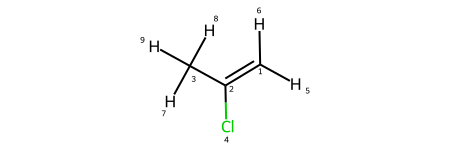

In [28]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDetermineBonds
from rdkit.Chem.Draw import IPythonConsole


def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()+1))
    return mol

raw_mol = Chem.MolFromXYZFile(xyzin)
mol2 = Chem.Mol(raw_mol)
Chem.rdDetermineBonds.DetermineBonds(mol2)
# mol2
AllChem.Compute2DCoords(mol2)
show_atom_number(mol2, 'atomNote')